<a href="https://colab.research.google.com/github/maxpestr/cozyharbour/blob/main/FinMrkt/FinMrktAlloc4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import warnings
import numpy as np
import pandas as pd
#import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FinMarkt/tickers500.csv')

In [ ]:
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

In [ ]:
df = df.drop(df.index[-1])

In [ ]:
df = df[4076:6200]

In [ ]:
df = df.dropna(axis=1)


In [ ]:
df

,Date,JBHT,JBL,JCI,JKHY,JNJ,KEY,KIM,KLAC,KMB,...,GDDY,ON,ETSY,KHC,PYPL,HPE,STE,MTCH,WTW,AVGO
4076,2016-03-18,80.2514,18.2209,31.1028,75.1838,85.2776,8.0619,18.8482,60.7644,102.8309,...,31.93,9.48,9.23,53.8952,39.41,6.1936,61.7259,10.66,85.2789,11.9840
4077,2016-03-21,79.9368,18.2488,31.0603,75.1293,85.1031,8.0902,18.4447,60.8327,102.6185,...,31.75,9.44,9.06,53.3933,41.14,6.3294,62.6403,10.90,85.4055,12.0155
4078,2016-03-22,79.3352,18.3325,30.7710,75.2655,85.1824,8.0760,18.5241,60.9864,101.3894,...,32.20,9.53,9.15,53.2887,41.32,6.2580,63.2073,10.94,85.4195,12.1624
4079,2016-03-23,79.6221,17.7559,30.3882,75.3108,86.0709,7.9698,18.3851,60.6107,101.6474,...,31.66,9.38,8.87,53.5466,40.52,6.2401,63.4816,10.72,83.9498,12.0233
4080,2016-03-24,79.6036,17.6164,30.6349,75.3290,85.9202,7.9203,18.3917,60.4400,101.3211,...,31.56,9.39,8.85,53.3026,38.92,6.2794,63.2987,11.03,83.9709,12.0241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,2024-08-21,175.5000,108.6100,70.5500,165.4500,160.2140,16.2412,22.8000,827.1400,144.5800,...,164.93,76.68,54.64,35.0380,71.46,18.8800,234.3800,37.14,283.6800,165.7800
6196,2024-08-22,173.3800,107.1400,70.6000,163.7900,161.1270,16.2214,22.8200,798.5200,144.6000,...,162.42,73.37,53.79,35.1171,71.52,18.7700,234.1400,36.42,285.1400,162.3400
6197,2024-08-23,176.9700,108.5100,71.2400,164.6300,162.8936,16.8635,23.2300,817.8400,143.6100,...,162.45,76.36,55.40,35.5026,71.70,19.2100,236.0100,37.32,281.4600,166.3600
6198,2024-08-26,175.9500,108.7000,71.4500,168.8400,163.3700,16.7450,23.3900,798.9700,144.1400,...,164.17,74.82,55.16,35.5224,72.04,19.1800,235.0700,37.37,285.4000,159.6200


In [ ]:
tickers = df.columns.tolist()
tickers.remove('Date')

In [ ]:
def Alloc_try(N=50, start=201, end=2100, tau=22, W=200, start_equity = 100000):
  random_tickers = random.sample(tickers, N)
  EQ = np.zeros((N, 2124))
  for i in range(N):
    EQ[i] = df[random_tickers[i]].values

  equity_total_UN = np.empty(2124)
  equity_total_UN.fill(np.nan)
  quant_UN = np.empty((N, 2124))
  quant_UN.fill(np.nan)
  shares_UN = np.empty((N, 2124))
  shares_UN.fill(np.nan)

  equity_total_UN[start-1] = start_equity
  for j in range(start, end):
    if (j-start)%end == 0:   #ЗДЕСЬ ЗАМЕНИЛИ TAU на END
      for i in range(len(random_tickers)):
        #print(1 / (EQ[i][j-1] * sum), random_tickers[i], j)
        shares_UN[i][j] = 1 / N
        quant_UN[i][j] = shares_UN[i][j]*equity_total_UN[j-1]/EQ[i][j-1]
        #print(shares_UN[i][j])
    else:
      for i in range(len(random_tickers)):
        #shares_UN[i][j] = shares_UN[i][j-1]
        quant_UN[i][j] = quant_UN[i][j-1]
    equity_total_UN[j] = np.sum(quant_UN[:, j] * EQ[:, j])

  equity_total_VOL = np.empty(2124)
  equity_total_VOL.fill(np.nan)
  quant_VOL = np.empty((N, 2124))
  quant_VOL.fill(np.nan)
  shares_VOL = np.empty((N, 2124))
  shares_VOL.fill(np.nan)

  Rday = np.empty((N, 2124))
  Rday.fill(np.nan)
  for i in range(N):
    for j in range(1, end):
      Rday[i][j] = (EQ[i][j] - EQ[i][j-1])/EQ[i][j-1]
  VOLday = np.empty((N, 2124))
  VOLday.fill(np.nan)
  for i in range(N):
    for j in range(1, end):
      if (j-start)%tau == 0:
        VOLday[i][j] = np.std(Rday[i][j - W:j])

  equity_total_VOL[start-1] = start_equity
  for j in range(start, end):
    if (j-start)%tau == 0:
      sum = np.sum(1 / VOLday[:,j], axis = 0)
      for i in range(len(random_tickers)):

        shares_VOL[i][j] = 1 / (VOLday[i][j] * sum)
        quant_VOL[i][j] = shares_VOL[i][j]*equity_total_VOL[j-1]/EQ[i][j-1]

    else:
      for i in range(len(random_tickers)):
        #shares_UN[i][j] = shares_UN[i][j-1]
        quant_VOL[i][j] = quant_VOL[i][j-1]
    equity_total_VOL[j] = np.sum(quant_VOL[:, j] * EQ[:, j])

  return {'UN': equity_total_UN, 'VOL': equity_total_VOL}

In [ ]:
days = np.linspace(200,2099,1900).astype(int)

In [ ]:
Dict = Alloc_try()
equity_total_UN, equity_total_VOL = Dict['UN'], Dict['VOL']

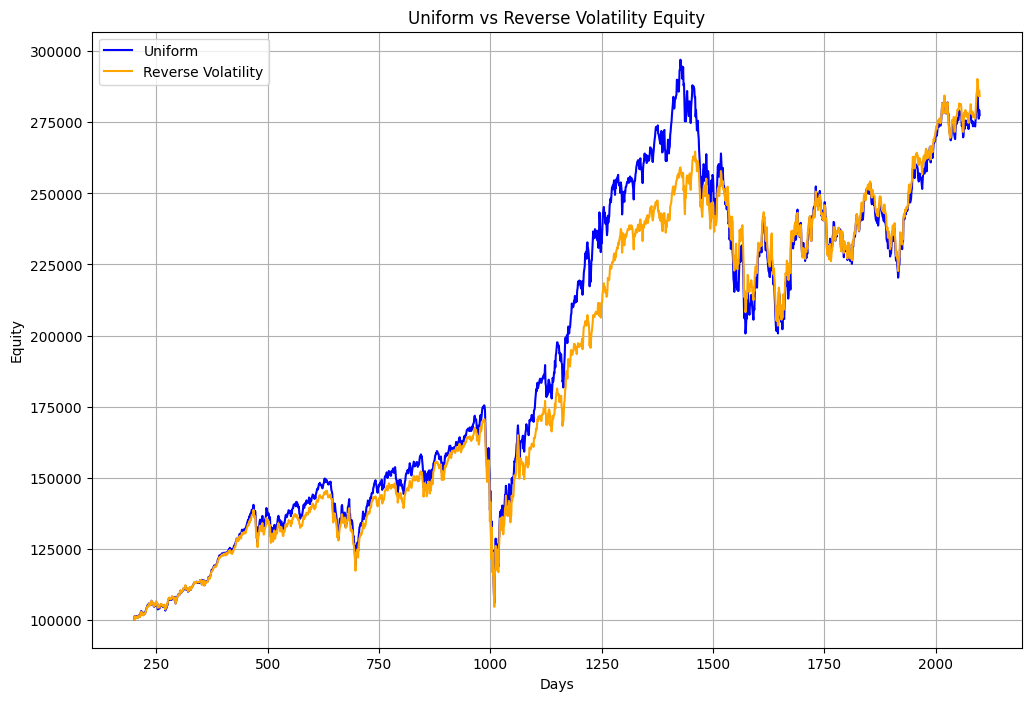

In [ ]:
# Создание графика
plt.figure(figsize=(12, 8))
plt.plot(days, equity_total_UN[200: 2100], label='Uniform', color='blue')
plt.plot(days, equity_total_VOL[200: 2100], label='Reverse Volatility', color='orange')

# Настройка графика
plt.title('Uniform vs Reverse Volatility Equity')
plt.xlabel('Days')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)

# Показать график
plt.show()

In [ ]:
L = 1000
start = 201
end = 2100

R_UN = np.empty(L)
STD_DEV_UN = np.empty(L)
SHRP_UN = np.empty(L)
RDAY_UN = np.empty(end)
RDAY_MEAN_UN = np.empty(L)

R_UN.fill(np.nan)
STD_DEV_UN.fill(np.nan)
SHRP_UN.fill(np.nan)
RDAY_UN.fill(np.nan)
RDAY_MEAN_UN.fill(np.nan)

R_VOL = np.empty(L)
STD_DEV_VOL = np.empty(L)
SHRP_VOL = np.empty(L)
RDAY_VOL = np.empty(end)
RDAY_MEAN_VOL = np.empty(L)

R_VOL.fill(np.nan)
STD_DEV_VOL.fill(np.nan)
SHRP_VOL.fill(np.nan)
RDAY_VOL.fill(np.nan)
RDAY_MEAN_VOL.fill(np.nan)

for k in range(L):
  Dict = Alloc_try(start = start, end = end)
  equity_total_UN, equity_total_VOL = Dict['UN'], Dict['VOL']

  R_UN[k] = (equity_total_UN[end-1] - equity_total_UN[start-1])/equity_total_UN[start-1]
  #R_VOL[k] = (equity_total_VOL[end-1] - equity_total_VOL[start-1])/equity_total_VOL[start-1]

  for j in range(start, end):
    RDAY_UN[j] = (equity_total_UN[j] - equity_total_UN[j-1])/equity_total_UN[j-1]

  RDAY_MEAN_UN[k] = np.mean(RDAY_UN[start:end])
  STD_DEV_UN[k] = np.std(RDAY_UN[start:end])
  SHRP_UN[k] = RDAY_MEAN_UN[k] / STD_DEV_UN[k]

  R_VOL[k] = (equity_total_VOL[end-1] - equity_total_VOL[start-1])/equity_total_VOL[start-1]

  for j in range(start, end):
    RDAY_VOL[j] = (equity_total_VOL[j] - equity_total_VOL[j-1])/equity_total_VOL[j-1]

  RDAY_MEAN_VOL[k] = np.mean(RDAY_VOL[start:end])
  STD_DEV_VOL[k] = np.std(RDAY_VOL[start:end])
  SHRP_VOL[k] = RDAY_MEAN_VOL[k] / STD_DEV_VOL[k]

#print(RDAY_MEAN_UN, STD_DEV_UN, SHRP_UN*np.sqrt(252))
#print(RDAY_MEAN_VOL, STD_DEV_VOL, SHRP_VOL*np.sqrt(252))


In [ ]:
#Средние значения (выборка из L портфелей)
print('Средняя доходность за период, Uniform', np.mean(R_UN))
print('Средняя сигма (дневная), Uniform', np.mean(STD_DEV_UN))
print('Средний Шарп (на год), Uniform', np.mean(SHRP_UN)*np.sqrt(252))
print('\n')
print('Средняя доходность за период, Reverse Volatility', np.mean(R_VOL))
print('Средняя сигма (дневная), Reverse Volatility', np.mean(STD_DEV_VOL))
print('Средний Шарп (на год), Reverse Volatility', np.mean(SHRP_VOL)*np.sqrt(252))

Средняя доходность за период, Uniform 2.4344050538157354
Средняя сигма (дневная), Uniform 0.01426856468221675
Средний Шарп (на год), Uniform 0.8344371624184708


Средняя доходность за период, Reverse Volatility 1.8410795219226639
Средняя сигма (дневная), Reverse Volatility 0.011736087749887285
Средний Шарп (на год), Reverse Volatility 0.8352777068229672


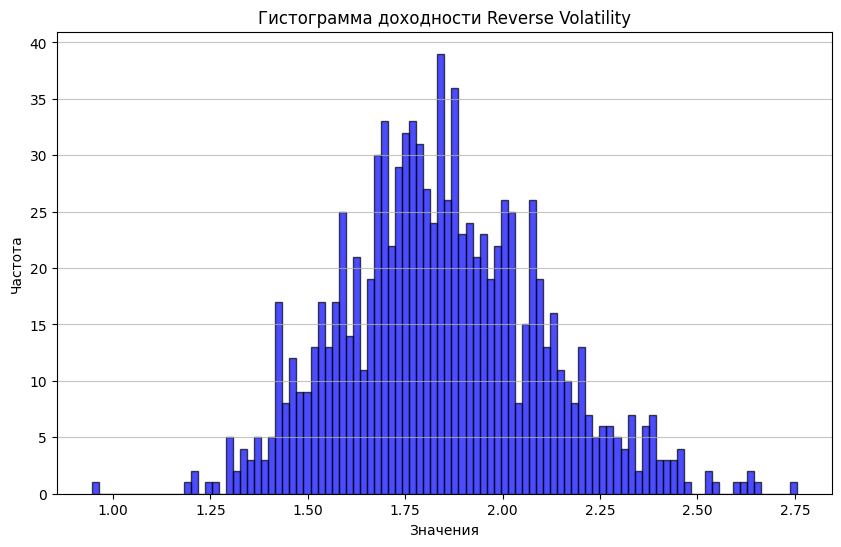

In [ ]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist(R_VOL, bins=100, alpha=0.7, color='blue', edgecolor='black')

# Настройка графика
plt.title('Гистограмма доходности Reverse Volatility')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Показать график
plt.show()

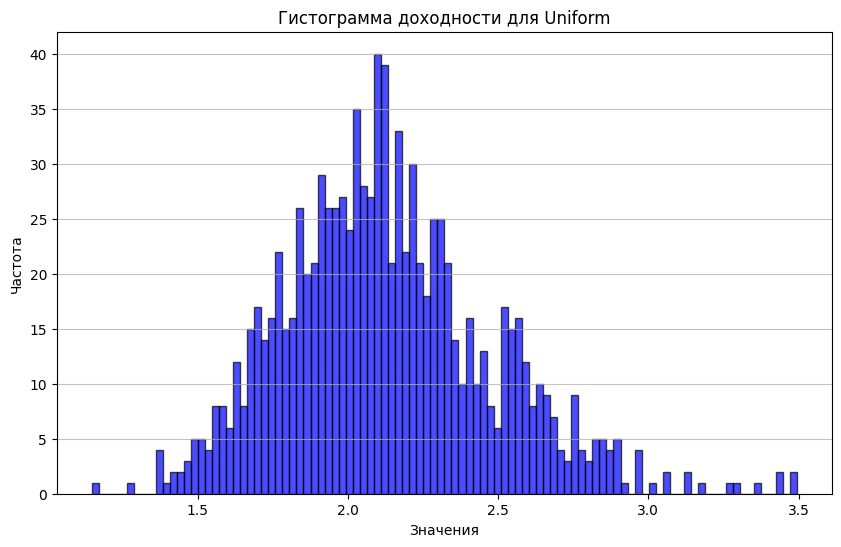

In [ ]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist(R_UN, bins=100, alpha=0.7, color='blue', edgecolor='black')

# Настройка графика
plt.title('Гистограмма доходности для Uniform')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Показать график
plt.show()

Теперь без рекапитализации

In [ ]:
def NOREC_Alloc_try(N=50, start=201, end=2100, tau=22, W=200, start_equity = 100000):
  random_tickers = random.sample(tickers, N)
  EQ = np.zeros((N, end))
  for i in range(N):
    EQ[i] = df[random_tickers[i]].values[:end]

  equity_total_UN = np.empty(end)
  equity_total_UN.fill(np.nan)
  quant_UN = np.empty((N, end))
  quant_UN.fill(np.nan)
  shares_UN = np.empty((N, end))
  shares_UN.fill(np.nan)
  total_UN = np.empty(end)
  total_UN.fill(np.nan)

  equity_total_UN[start-1] = start_equity
  capital = 0
  for j in range(start, end):
    if (j-start)%tau == 0:
      capital+=equity_total_UN[j-1] - start_equity
      for i in range(len(random_tickers)):
        #print(1 / (EQ[i][j-1] * sum), random_tickers[i], j)
        shares_UN[i][j] = 1 / N
        quant_UN[i][j] = shares_UN[i][j]*start_equity/EQ[i][j-1]
        #print(shares_UN[i][j])
    else:
      for i in range(len(random_tickers)):
        #shares_UN[i][j] = shares_UN[i][j-1]
        quant_UN[i][j] = quant_UN[i][j-1]
    equity_total_UN[j] = np.sum(quant_UN[:, j] * EQ[:, j])
    total_UN[j] = equity_total_UN[j] + capital


  equity_total_VOL = np.empty(end)
  equity_total_VOL.fill(np.nan)
  quant_VOL = np.empty((N, end))
  quant_VOL.fill(np.nan)
  shares_VOL = np.empty((N, end))
  shares_VOL.fill(np.nan)
  total_VOL = np.empty(end)
  total_VOL.fill(np.nan)

  Rday = np.empty((N, end))
  Rday.fill(np.nan)
  for i in range(N):
    for j in range(1, end):
      Rday[i][j] = (EQ[i][j] - EQ[i][j-1])/EQ[i][j-1]

  VOLday = np.empty((N, end))
  VOLday.fill(np.nan)
  for i in range(N):
    for j in range(1, end):
      if (j-start)%tau == 0:
        VOLday[i][j] = np.std(Rday[i][j - W:j])

  capital = 0
  equity_total_VOL[start-1] = start_equity
  for j in range(start, end):
    if (j-start)%tau == 0:
      capital+=equity_total_VOL[j-1] - start_equity
      sum = np.sum(1 / VOLday[:,j], axis = 0)
      for i in range(len(random_tickers)):

        shares_VOL[i][j] = 1 / (VOLday[i][j] * sum)
        quant_VOL[i][j] = shares_VOL[i][j]*start_equity/EQ[i][j-1]

    else:
      for i in range(len(random_tickers)):
        #shares_UN[i][j] = shares_UN[i][j-1]
        quant_VOL[i][j] = quant_VOL[i][j-1]
    equity_total_VOL[j] = np.sum(quant_VOL[:, j] * EQ[:, j])
    total_VOL[j] = equity_total_VOL[j] + capital

  return {'UN': total_UN, 'VOL': total_VOL}

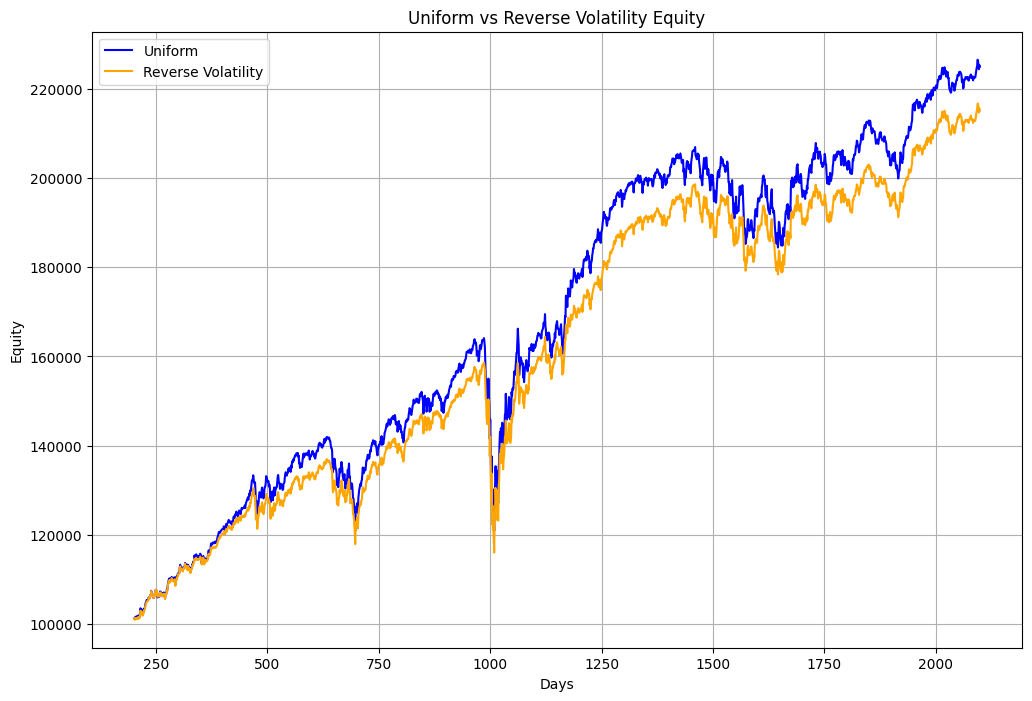

In [ ]:
days = np.linspace(200,2099,1900).astype(int)

Dict = NOREC_Alloc_try()
equity_total_UN, equity_total_VOL = Dict['UN'], Dict['VOL']

# Создание графика
plt.figure(figsize=(12, 8))
plt.plot(days, equity_total_UN[200: 2100], label='Uniform', color='blue')
plt.plot(days, equity_total_VOL[200: 2100], label='Reverse Volatility', color='orange')

# Настройка графика
plt.title('Uniform vs Reverse Volatility Equity')
plt.xlabel('Days')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)

# Показать график
plt.show()

In [ ]:
L = 1000
start = 201
end = 2100

R_UN = np.empty(L)
STD_DEV_UN = np.empty(L)
SHRP_UN = np.empty(L)
RDAY_UN = np.empty(end)
RDAY_MEAN_UN = np.empty(L)

R_UN.fill(np.nan)
STD_DEV_UN.fill(np.nan)
SHRP_UN.fill(np.nan)
RDAY_UN.fill(np.nan)
RDAY_MEAN_UN.fill(np.nan)

R_VOL = np.empty(L)
STD_DEV_VOL = np.empty(L)
SHRP_VOL = np.empty(L)
RDAY_VOL = np.empty(end)
RDAY_MEAN_VOL = np.empty(L)

R_VOL.fill(np.nan)
STD_DEV_VOL.fill(np.nan)
SHRP_VOL.fill(np.nan)
RDAY_VOL.fill(np.nan)
RDAY_MEAN_VOL.fill(np.nan)

for k in range(L):
  Dict = NOREC_Alloc_try(start = start, end = end)
  equity_total_UN, equity_total_VOL = Dict['UN'][:end], Dict['VOL'][:end]

  R_UN[k] = (equity_total_UN[end-1] - equity_total_UN[start])/equity_total_UN[start]
  #R_VOL[k] = (equity_total_VOL[end-1] - equity_total_VOL[start-1])/equity_total_VOL[start-1]

  for j in range(start+1, end):
    RDAY_UN[j] = (equity_total_UN[j] - equity_total_UN[j-1])/equity_total_UN[j-1]

  RDAY_MEAN_UN[k] = np.mean(RDAY_UN[start+1:end])
  STD_DEV_UN[k] = np.std(RDAY_UN[start+1:end])
  SHRP_UN[k] = RDAY_MEAN_UN[k] / STD_DEV_UN[k]

  R_VOL[k] = (equity_total_VOL[end-1] - equity_total_VOL[start])/equity_total_VOL[start]

  for j in range(start+1, end):
    RDAY_VOL[j] = (equity_total_VOL[j] - equity_total_VOL[j-1])/equity_total_VOL[j-1]

  RDAY_MEAN_VOL[k] = np.mean(RDAY_VOL[start+1:end])
  STD_DEV_VOL[k] = np.std(RDAY_VOL[start+1:end])
  SHRP_VOL[k] = RDAY_MEAN_VOL[k] / STD_DEV_VOL[k]

#print(RDAY_MEAN_UN, STD_DEV_UN, SHRP_UN*np.sqrt(252))
#print(RDAY_MEAN_VOL, STD_DEV_VOL, SHRP_VOL*np.sqrt(252))


In [ ]:
#Средние значения (выборка из L портфелей)
print('Средняя доходность за период, Uniform', np.mean(R_UN))
print('Средняя сигма (дневная), Uniform', np.mean(STD_DEV_UN))
print('Средний Шарп (на год), Uniform', np.mean(SHRP_UN)*np.sqrt(252))
print('\n')
print('Средняя доходность за период, Reverse Volatility', np.mean(R_VOL))
print('Средняя сигма (дневная), Reverse Volatility', np.mean(STD_DEV_VOL))
print('Средний Шарп (на год), Reverse Volatility', np.mean(SHRP_VOL)*np.sqrt(252))

Средняя доходность за период, Uniform 1.2205397678151393
Средняя сигма (дневная), Uniform 0.007968746441418787
Средний Шарп (на год), Uniform 0.9030046110503117


Средняя доходность за период, Reverse Volatility 1.113534280852528
Средняя сигма (дневная), Reverse Volatility 0.007704735791625451
Средний Шарп (на год), Reverse Volatility 0.8755664399944495


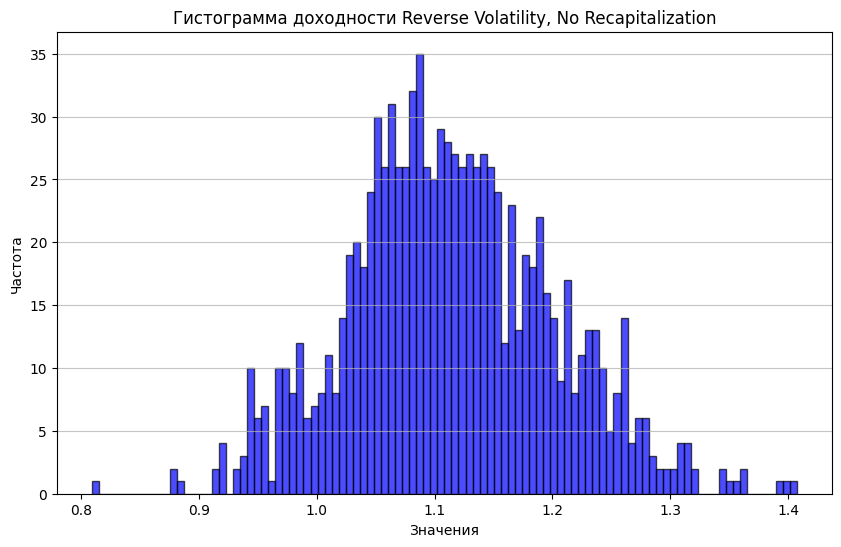

In [ ]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist(R_VOL, bins=100, alpha=0.7, color='blue', edgecolor='black')

# Настройка графика
plt.title('Гистограмма доходности Reverse Volatility, No Recapitalization')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Показать график
plt.show()

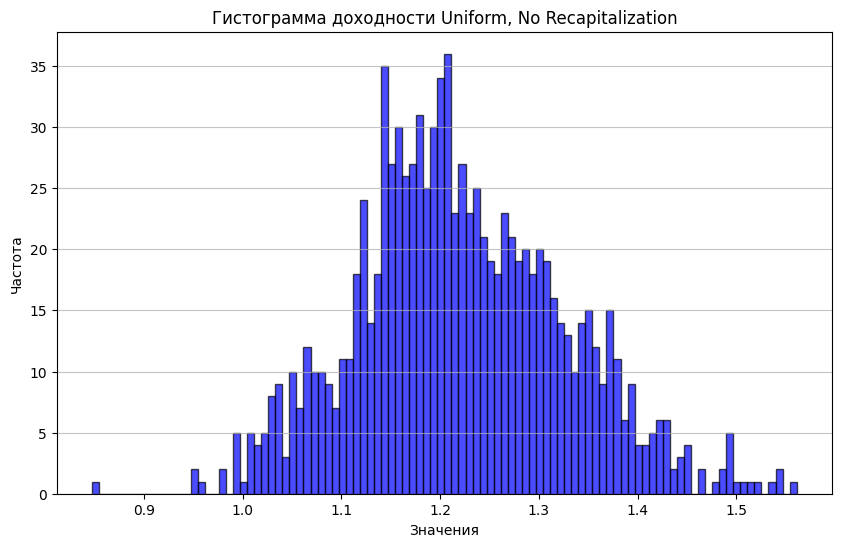

In [ ]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
plt.hist(R_UN, bins=100, alpha=0.7, color='blue', edgecolor='black')

# Настройка графика
plt.title('Гистограмма доходности Uniform, No Recapitalization')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)

# Показать график
plt.show()